In [58]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np 

In [59]:
import pandas as pd
df=pd.read_csv('loan_approval_dataset.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()
df.drop(columns=['loan_id'], inplace=True)
conData=0
df=df.fillna(conData)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [60]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['education'] = label_encoder.fit_transform(df['education'])

# Apply label encoding to the 'self_employed' column
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [61]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='loan_status', ylabel='cibil_score'>

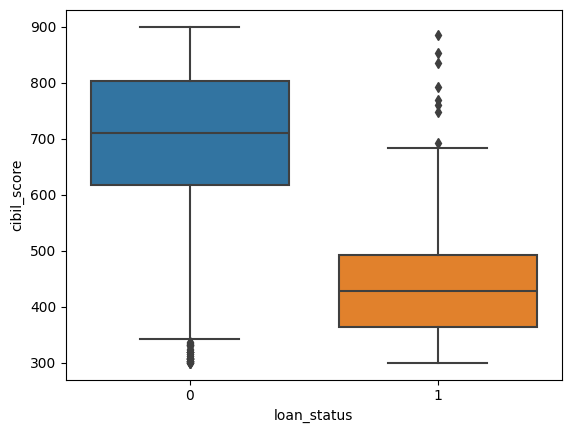

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='loan_status', y='cibil_score', data=df)

C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\IICT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Axes: xlabel='cibil_score', ylabel='loan_amount'>

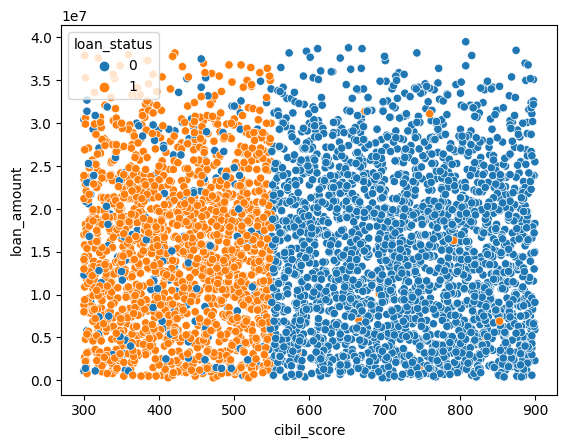

In [63]:
sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=df)

In [64]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [65]:
#sns.countplot(x='cibil_grp',hue='loan_status',data=df)

In [66]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
x = df.drop(columns=['loan_status'])  # Drop 'loan_status' column to get feature columns
y = df['loan_status']  # Target variable


# Select only the numerical columns for scaling (excluding 'loan_status')
#numerical_columns = [ 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
#                      'bank_asset_value']

numerical_columns = [ 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

 

# Apply scaling to the numerical columns
#x[numerical_columns] = scaler.fit_transform(x[numerical_columns])


# Display the scaled feature variables (X) and the target variable (y)
#print("Scaled Feature Variables (x):")
#print(x.head())

#from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

 

#Obj = WOE_Encoder(cols=numerical_columns, size=x[numerical_columns].shape[0])
#x[numerical_columns] = Obj.WOE_fit(x[numerical_columns], y)



#BOX-COX
#lemda=0.5
#num_df=(num_df**lemda)
#num_df=num_df-1
#num_df[num_df < 0]=0
#num_df=num_df.div(lemda)
#End BOX-COX
#Z-score
#num_df=(num_df-num_df.min())/(num_df.std(ddof=0)) ##Z-score

#Log
x[numerical_columns]=round(np.log(x[numerical_columns].add(1)),2)
 
#End Log

x=x.fillna(0)

# Display the scaled feature variables (X) and the target variable (y)
print("Log Feature Variables (x):")
print(x.head())


Log Feature Variables (x):
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0         16.08        17.21   
1                 0          1              1         15.23        16.32   
2                 3          0              0         16.02        17.21   
3                 3          0              0         15.92        17.24   
4                 5          1              1         16.10        17.00   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0       2.56         6.66                     14.69                    16.68   
1       2.20         6.04                     14.81                    14.60   
2       3.04         6.23                     15.78                    15.32   
3       2.20         6.15                     16.72                    15.01   
4       3.04         5.95                     16.33                    15.92   

   luxury_assets_value  bank_asset_

C:\Users\IICT\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [67]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,16.08,17.21,2.56,6.66,14.69,16.68,16.94,15.89
1,0,1,1,15.23,16.32,2.20,6.04,14.81,14.60,15.99,15.01
2,3,0,0,16.02,17.21,3.04,6.23,15.78,15.32,17.32,16.36
3,3,0,0,15.92,17.24,2.20,6.15,16.72,15.01,16.96,15.88
4,5,1,1,16.10,17.00,3.04,5.95,16.33,15.92,17.20,15.42
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,13.82,14.65,2.56,5.76,14.85,13.12,15.01,13.59
4265,0,1,1,15.01,16.24,3.04,6.33,15.25,14.88,16.21,14.46
4266,2,1,0,15.69,16.99,2.94,6.13,14.00,16.33,16.71,15.80
4267,1,1,0,15.23,16.36,2.20,6.66,15.92,13.46,16.46,15.57


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

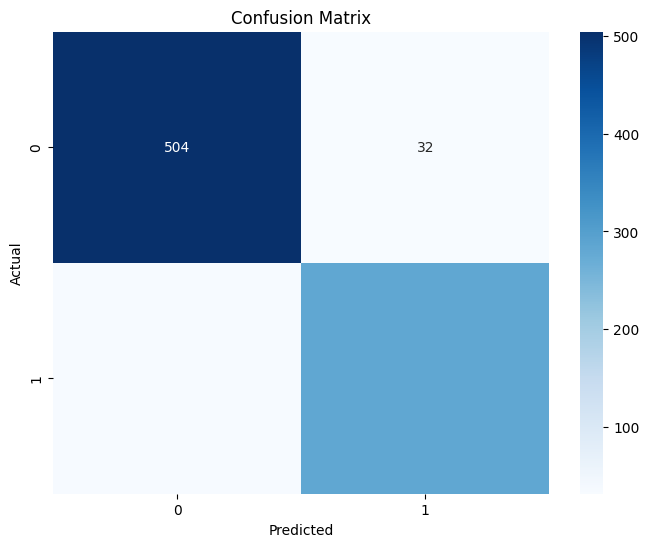

GaussianNB Classifier Metrics:
Accuracy: 0.9215456674473068
Precision: 0.9214169125176149
Recall: 0.9215456674473068
F1 Score: 0.921469227868362
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       536
           1       0.90      0.89      0.89       318

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



In [69]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB()

# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("GaussianNB Report:\n", classification_rep)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

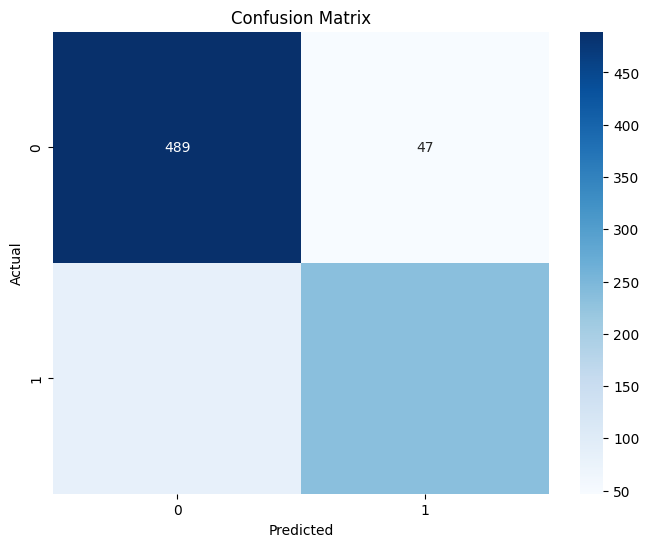

LogisticRegression Classifier Metrics:
Accuracy: 0.8466042154566745
Precision: 0.845708983220128
Recall: 0.8466042154566745
F1 Score: 0.8444255178269214
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       536
           1       0.83      0.74      0.78       318

    accuracy                           0.85       854
   macro avg       0.84      0.82      0.83       854
weighted avg       0.85      0.85      0.84       854



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

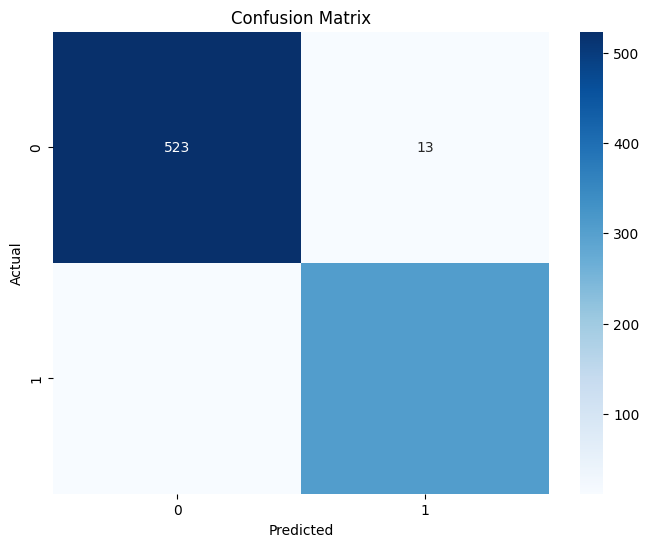

Decision Tree Classifier Metrics:
Accuracy: 0.9707259953161592
Precision: 0.9707474501692681
Recall: 0.9707259953161592
F1 Score: 0.9707353066729605
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

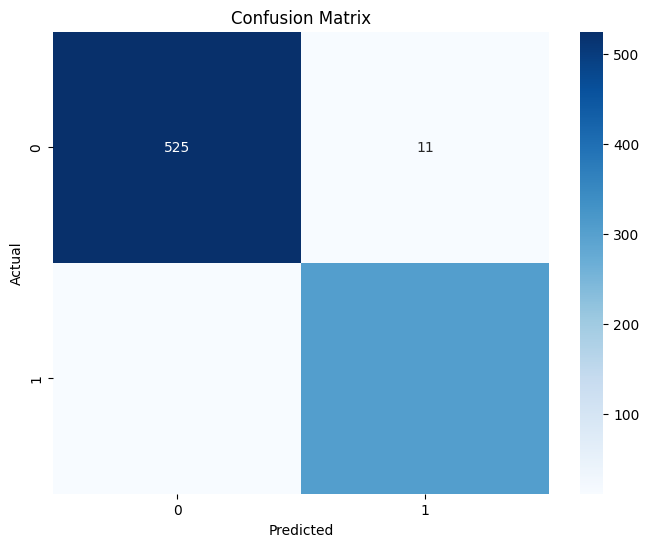

Random Forest Classifier Metrics:
Accuracy: 0.9730679156908665
Precision: 0.9730534497110747
Recall: 0.9730679156908665
F1 Score: 0.9730592592247604
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.96      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

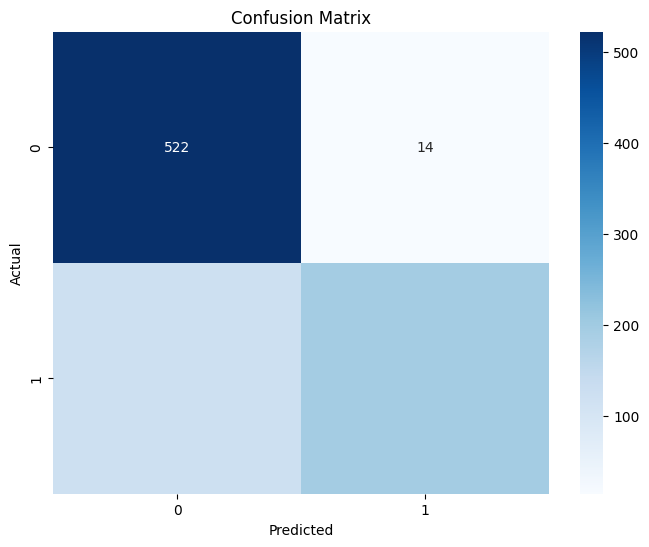

SVM Classifier Metrics:
Accuracy: 0.8407494145199064
Precision: 0.856275910221537
Recall: 0.8407494145199064
F1 Score: 0.8317501614806421
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       536
           1       0.93      0.62      0.74       318

    accuracy                           0.84       854
   macro avg       0.87      0.80      0.81       854
weighted avg       0.86      0.84      0.83       854



In [73]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in 

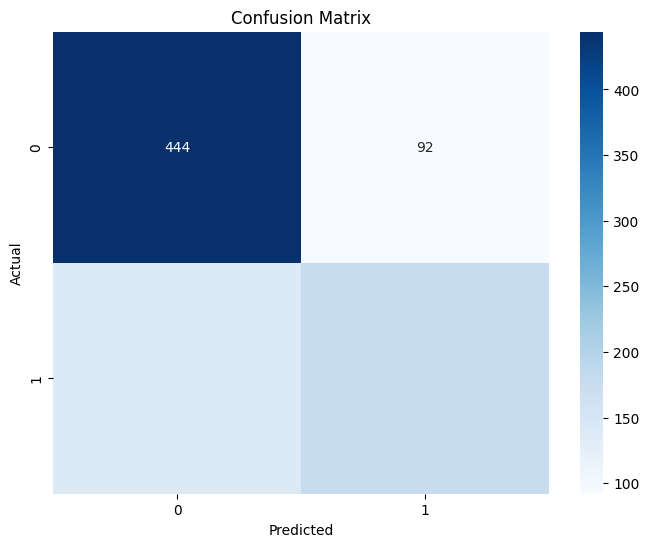

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.7283372365339579
Precision: 0.7226595945661743
Recall: 0.7283372365339579
F1 Score: 0.7230703054055346
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       536
           1       0.66      0.56      0.61       318

    accuracy                           0.73       854
   macro avg       0.71      0.69      0.70       854
weighted avg       0.72      0.73      0.72       854



In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Users\IICT\anaconda3\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\IICT\anaconda3\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\IICT\anaconda3\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\IICT\anaconda3\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Us

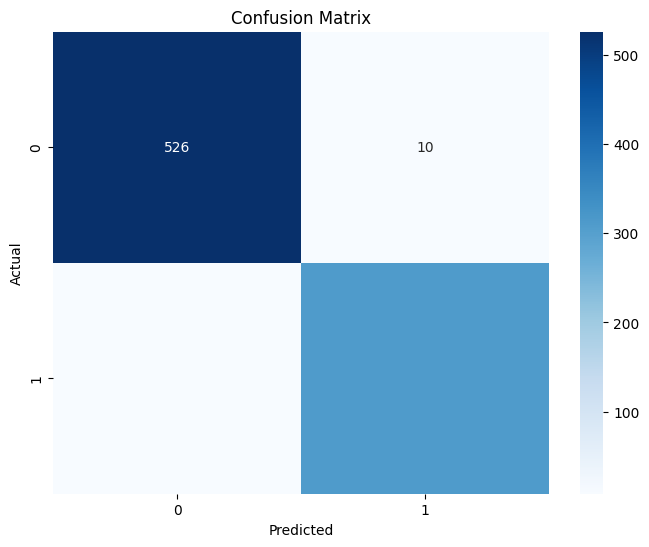

XGBoost Classifier Metrics:
Accuracy: 0.9789227166276346
Precision: 0.9789608166899104
Recall: 0.9789227166276346
F1 Score: 0.9789360547262737
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\IICT\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

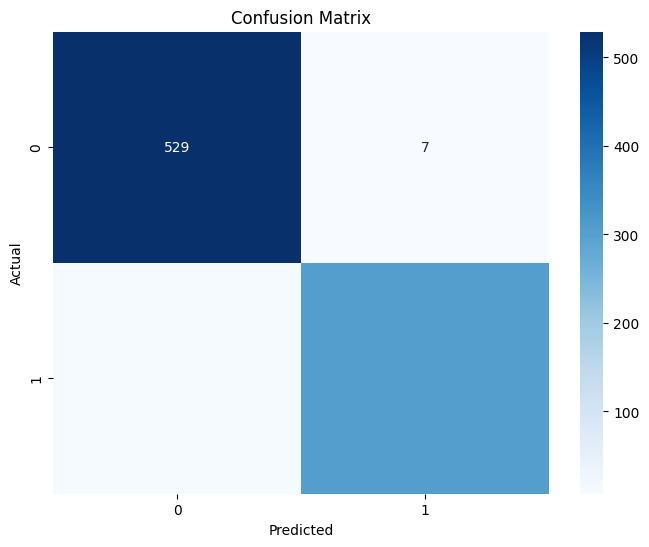

Ensemble Classifier Metrics:
Accuracy: 0.977751756440281
Precision: 0.9777506845946926
Recall: 0.977751756440281
F1 Score: 0.9777152536943943
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier), 
    ('logistic_reg', logistic_reg)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [77]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model
model = Sequential()
#get number of columns in training data
n_cols = X_encoded_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred = model.predict(X_encoded_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

ModuleNotFoundError: No module named 'tensorflow.compat'

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model